# Inference (+)

This Notebook is an "upgrade" of the previous [inference.ipynb](https://colab.research.google.com/drive/13g3rX2zgyxT5YKTZILBrISybmLJ4_pXi#scrollTo=lg3xG4oIq9gB) Notebook. The aim is the same, although this version additionally allows the user to visualize the vector Z and study its influence (the coordinates of this vector can be exported in a txt file at the end of the interpolation). Images can also be generetaed numerously easily (using the `nb_inf` parameters and others, as explained in the [README of the attached repository](https://github.com/kaugrv/models_words), which may also help understanding how this Notebook works!)




## Import libraries

In [ ]:
import numpy as np
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from numpy import linspace
from tensorflow.keras.models import load_model
from matplotlib import pyplot
from PIL import Image
import PIL
from matplotlib.pyplot import imsave
from matplotlib.pyplot import cm
import io
import imageio
import matplotlib.pyplot as plt

## Import model
Select the generator.h5 file

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

Create a folder for the outputs

In [ ]:
!mkdir images

## Functions

A group of functions for :
- generating vectors in the latent space
- interpolating between vectors
- plotting outputs as images
- plotting vector Z as a 10x10 gray grid

In [ ]:
# generate points (vectors) in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input



# uniform interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps):
    # interpolate ratios between the points
    ratios = linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return asarray(vectors)

# plot images
def plot_generated(img, n, j):
    # plot all n images
    plt.figure()

    for i in range(n):
        pyplot.subplot(1, n, i+1)
        pyplot.axis('off')
        pyplot.imshow(img[i])
        imsave("images/image_"+str(j)+"_%02d.png" % i, img[i])

    # plot first image
    plt.figure()
    pyplot.subplot(1, 3, 1)
    pyplot.axis('off')
    pyplot.imshow(img[0])
    plt.title("image_00")

    # plot mid image
    pyplot.subplot(1, 3, 2)
    pyplot.axis('off')
    pyplot.imshow(img[int(n/2)])
    if int(n/2) < 10 :
      plt.title('image_0'+str(int(n/2)))
    else : 
      plt.title('image_'+str(int(n/2)))
    
    # plot last image
    pyplot.subplot(1, 3, 3)
    pyplot.axis('off')
    pyplot.imshow(img[int(n-1)])
    if int(n-1) < 10 :
      plt.title('image_0'+str(int(n-1)))
    else : 
      plt.title('image_'+str(int(n-1)))

    plt.show()


# displays the vec100 of index i in Z as a gray 10x10 heatmap
def printZ(Z, i, j):
  img = plt.imshow(np.reshape(Z[i], (10,10)), cmap="gray")
  plt.axis('off')
  plt.savefig("images/Vec_"+str(j)+"_%02d.png" % i, bbox_inches='tight', pad_inches=0.0)
  plt.show()


## Inference

Infer and interpolate

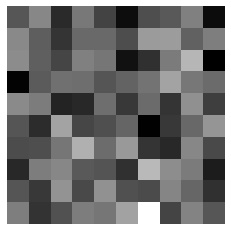

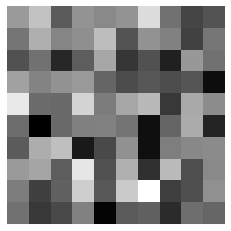

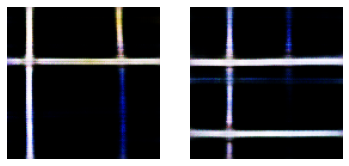

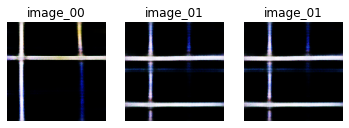

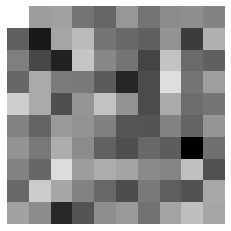

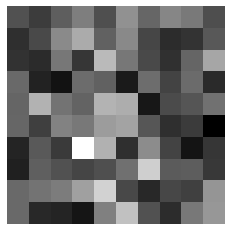

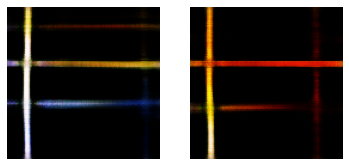

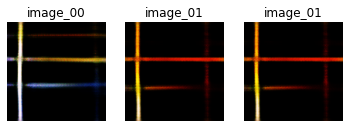

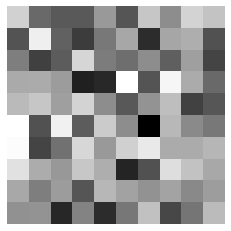

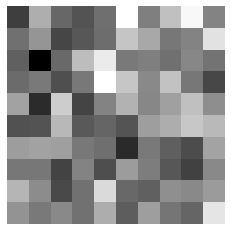

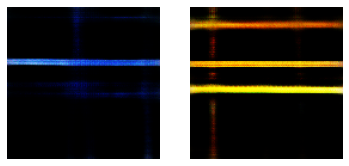

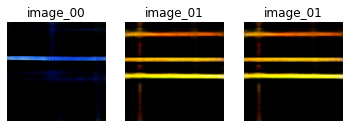

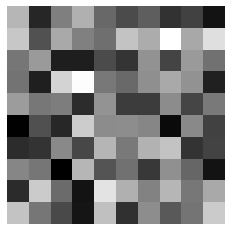

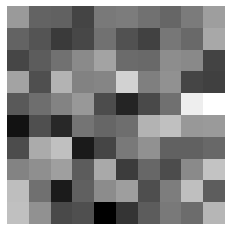

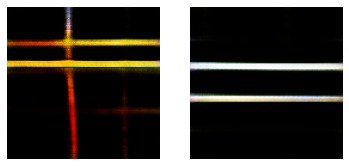

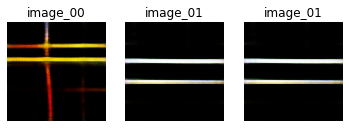

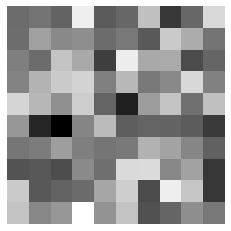

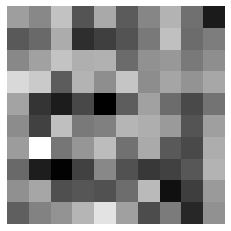

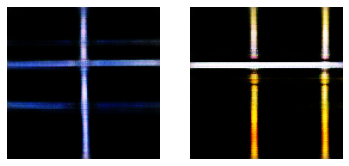

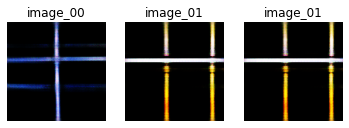

In [ ]:
# refresh output directory
!rm -r images/
!mkdir images

# create a plot of generated images
size = 128

# number of groups of images which will be generated
nb_inf = 5

for j in range (nb_inf):

  # load model
  model = load_model('generator.h5')

  # generate points (vectors) in latent space
  nb_vec = 2
  pts = generate_latent_points(100, nb_vec)

  # if you want to make up a vector by yourself, use a similar syntax as :
  #
  # pts = np.array([[ 1.48609970e+00, -1.11420270e+00,  2.24371955e+00,
  #          1.02140213e+00,  5.01578560e-01, -1.66130413e+00,
  #          8.86232531e-01, -6.85214272e-01,  3.42628480e+00,
  #         -2.00495869e+00, -3.35011517e-01, -6.40959793e-01,
  #         -2.28302709e-01,  6.15696347e-01, -3.18559310e-02,
  #          3.34310004e-01, -1.49729144e+00, -1.12322053e+00,
  #          6.34535564e-01,  6.82254735e-01, -1.14454827e+00,
  #         -1.15378599e+00,  1.03759515e+00,  4.67493164e-01,
  #         -3.24225890e-01,  3.48500165e-02, -1.27466505e+00,
  #         -1.85092458e+00,  4.87278478e-01,  1.03175497e+00,
  #         -7.17512654e-01,  9.38836972e-01,  4.81443406e-01,
  #          1.09131494e+00, -2.66445256e-01, -7.45233292e-03,
  #         -2.86040262e-01, -5.92413422e-01,  2.45590353e-01,
  #          1.19199151e+00,  2.95674450e+00,  6.99214244e-01,
  #         -7.26727602e-01,  8.34191850e-01, -1.32058341e-01,
  #         -3.04157808e-01, -3.69526190e-01,  5.39056856e-02,
  #         -1.67496552e+00, -1.74144220e+00,  4.46962515e-01,
  #          7.06448520e-01,  1.54086572e+00, -1.19497731e+00,
  #          1.23230278e+00, -9.39397734e-02, -7.45868434e-01,
  #         -6.84253171e-01, -1.10050907e-02,  1.13288597e+00,
  #          7.36694779e-01, -7.82318448e-01,  1.51575588e+00,
  #          1.62576105e+00,  6.86936744e-01, -1.90784393e-01,
  #         -3.28784672e-01,  7.99567272e-01,  3.80877039e-01,
  #         -2.09268182e+00,  5.80702075e-01,  1.56243008e-02,
  #         -7.28125695e-01,  1.86293719e+00,  5.56110160e-01,
  #          1.03467203e+00, -9.90329591e-01,  8.27097275e-02,
  #          7.01489314e-01, -5.44697472e-01, -9.05981923e-01,
  #         -4.06788501e-01,  2.87184302e-01, -1.57006617e-02,
  #          8.54626591e-01, -4.13249290e-01, -5.15721865e-01,
  #          1.60596011e-03, -4.41372212e-01, -9.15375681e-01,
  #         -2.30006025e-01,  2.43834857e+00,  1.00614447e+00,
  #          2.13820531e-01,  4.95898791e-01,  7.03554146e-01,
  #          5.09894426e-01, -7.01098788e-02,  7.07517342e-01,
  #         -2.97999923e-02],
  #        [ 7.07877202e-01, -1.65525246e+00, -4.83588166e-01,
  #          1.75190831e+00, -2.20995149e-01,  5.25197419e-01,
  #         -8.88005157e-01,  1.15667775e-01,  2.76173166e-02,
  #          1.78491385e-01, -5.96253808e-01, -4.75074762e-01,
  #          1.54560251e-01,  6.79917779e-01, -3.57538088e-01,
  #         -1.53663878e+00, -8.73703635e-01,  1.28219374e-01,
  #         -6.17818222e-01, -3.14553734e-01,  1.02674255e+00,
  #         -1.09817851e+00,  7.31293718e-01,  1.17353112e+00,
  #          4.15397174e-01,  1.38068320e-01, -2.05265082e-01,
  #         -3.45935169e-01, -4.44401187e-01,  1.78974771e+00,
  #          1.67412343e+00,  1.33954993e-01, -1.01379095e+00,
  #          6.46015524e-01, -3.47967772e-01,  1.56331305e+00,
  #          9.64512036e-02, -8.52542665e-02,  7.63826224e-01,
  #         -1.42094300e+00,  7.23908942e-02, -7.44739771e-01,
  #          7.80604930e-01, -1.75632270e+00, -8.66785957e-01,
  #         -3.48184215e-01,  4.22217721e-01, -7.60862281e-02,
  #          3.04844390e-02, -1.44681958e-01, -3.63606929e+00,
  #          6.99978297e-02, -7.53223034e-01, -7.16316619e-01,
  #         -6.35669493e-01, -1.04246587e-01, -1.24176030e+00,
  #          3.70484943e-02, -2.40770243e-01, -7.40436554e-01,
  #         -8.74499326e-01, -3.62832539e-01,  2.85365224e-01,
  #         -1.00312261e+00,  8.76710378e-01, -8.90506874e-01,
  #          6.49971742e-01,  6.21295750e-01, -6.81292713e-01,
  #         -1.06128365e+00, -3.30973817e-01, -1.22822280e+00,
  #         -3.18767914e-02,  5.98605900e-01, -1.72146641e+00,
  #          3.16108507e-01,  6.52205791e-01,  7.56828021e-01,
  #          2.51736038e-01, -5.00355688e-01, -1.89609630e+00,
  #          9.21789876e-02,  9.76764094e-01,  1.08594347e+00,
  #          4.63056748e-01,  3.14916184e+00, -7.18722256e-01,
  #         -3.04566545e-01,  5.56235276e-01,  1.01215271e+00,
  #          8.24090221e-01,  2.28139084e+00, -1.39181926e+00,
  #         -6.95566339e-01,  9.06282350e-01, -2.37280294e-01,
  #          1.04128763e+00, -6.65726241e-02,  4.95579236e-01,
  #          7.25991926e-01]])

  for i in range(0, nb_vec):
    printZ(pts, i, j) # heatmap of Z
    #print(repr(pts)) # print coordinates as arrays

  # interpolate points in latent space
  nb_img = 2
  interpolated = interpolate_points(pts[0], pts[1], nb_img)

  # generate images (INFERENCE)
  # ------------------------------
  X = model.predict(interpolated)
  # ------------------------------

  # scale from [-1,1] to [0,1]
  X = (X + 1) / 2.0

  # plot the result
  plot_generated(X, len(interpolated), j)

  # export the 2 arrays of vec100 coordinates in a txt file 
  with open("images"+"/"+'Vec_'+str (j)+'.txt', 'x') as f:
      print(repr(pts), file=f)

Download images

In [ ]:
import shutil
shutil.make_archive('inference','zip','/content/images')
files.download('inference.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Super Resolution

This part is made for enhancing the resolution of the previous images. All inferred images can be improved together, up to 512x512 each (instead of the original 128x128).

In [ ]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [ ]:
# Declaring Constants
IMAGE_PATH = "/content/images/"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [ ]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  # print("Saved as %s.jpg" % filename)

In [ ]:
%matplotlib inline
def plot_image(image, title=""):
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.figure()
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

In [ ]:
model = hub.load(SAVED_MODEL_PATH)

Downloaded https://tfhub.dev/captain-pool/esrgan-tf2/1, Total size: 20.60MB



In [ ]:
for i in range (50) :
  for j in range(1,2) :
    IMAGE_PATH = "/content/images/image_"+str(i)+"_0"+str(j)+".png"

    hr_image = preprocess_image(IMAGE_PATH)

    start = time.time()
    fake_image = model(hr_image)
    fake_image = tf.squeeze(fake_image)
    # print("Time Taken: %f" % (time.time() - start))
    # Plotting Super Resolution Image
    plot_image(tf.squeeze(fake_image), title="Super Resolution "+str(i))
    save_image(tf.squeeze(fake_image), filename="images/SR_"+str(i)+"_0"+str(j))

Download enhanced images

In [ ]:
from google.colab import files

shutil.make_archive('superresolution','zip','/content/images/')
files.download('superresolution.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>